In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    print("Using CUDA (GPU)")

    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    print("Using MPS (macOS)")
    device = torch.device("mps")
else:
    print("Using CPU (Default)")
    device = torch.device("cpu")

Using CUDA (GPU)


In [5]:
bin_dataset = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
full_dataset = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")


print("Duplicate rows in bin_dataset:", bin_dataset.duplicated().sum())
print("Duplicate rows in full_dataset:", full_dataset.duplicated().sum())
#check difference between the two datasets with duplicate rows and without
bin_dataset = bin_dataset.drop_duplicates()
full_dataset = full_dataset.drop_duplicates()
print("Duplicate rows in bin_dataset:", bin_dataset.duplicated().sum())
print("Duplicate rows in full_dataset:", full_dataset.duplicated().sum())

print("bin_dataset shape:", bin_dataset.shape)
print("full_dataset shape:", full_dataset.shape)
#check for null values
print("Null values in bin_dataset:", bin_dataset.isnull().sum().sum())
print("Null values in full_dataset:", full_dataset.isnull().sum().sum())
#no NANs cool

bin_dataset.info(), full_dataset.info() # all columns are float cool






Duplicate rows in bin_dataset: 24206
Duplicate rows in full_dataset: 23899
Duplicate rows in bin_dataset: 0
Duplicate rows in full_dataset: 0
bin_dataset shape: (229474, 22)
full_dataset shape: (229781, 22)
Null values in bin_dataset: 0
Null values in full_dataset: 0
<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 1

(None, None)

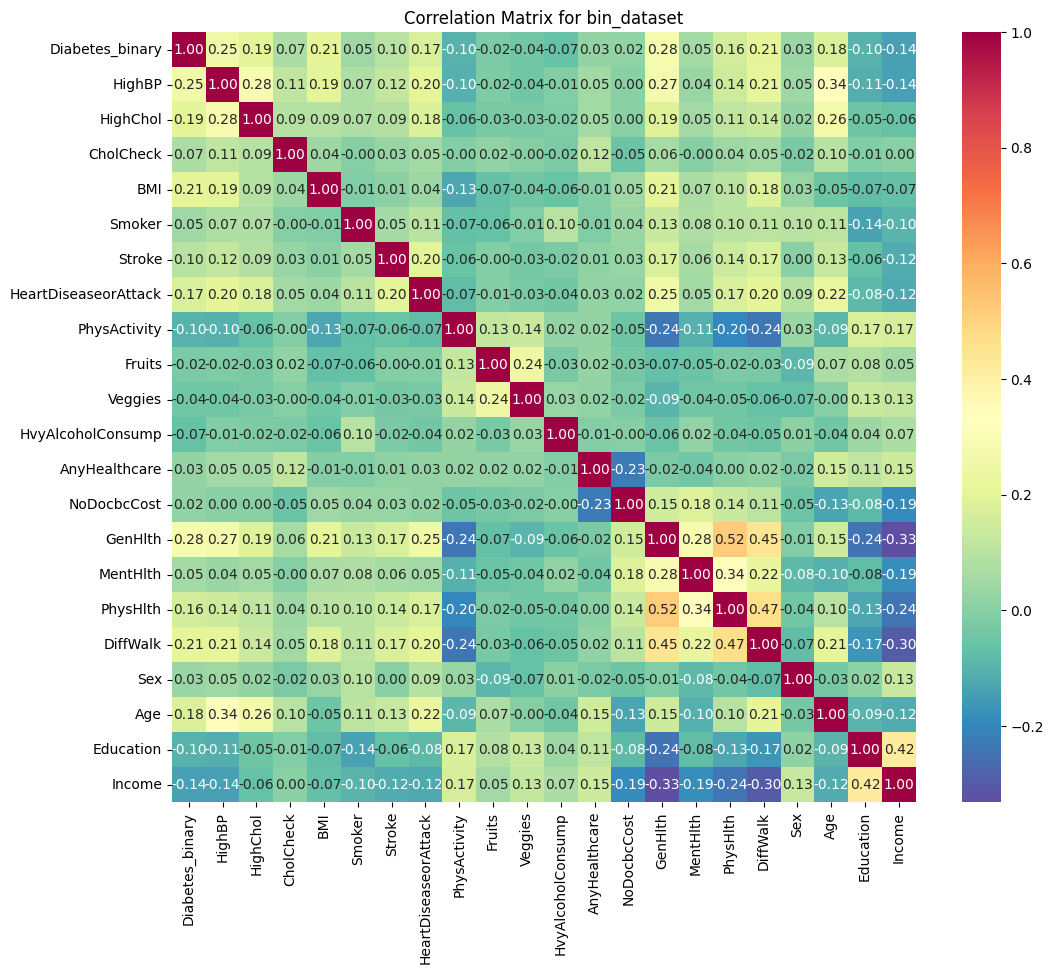

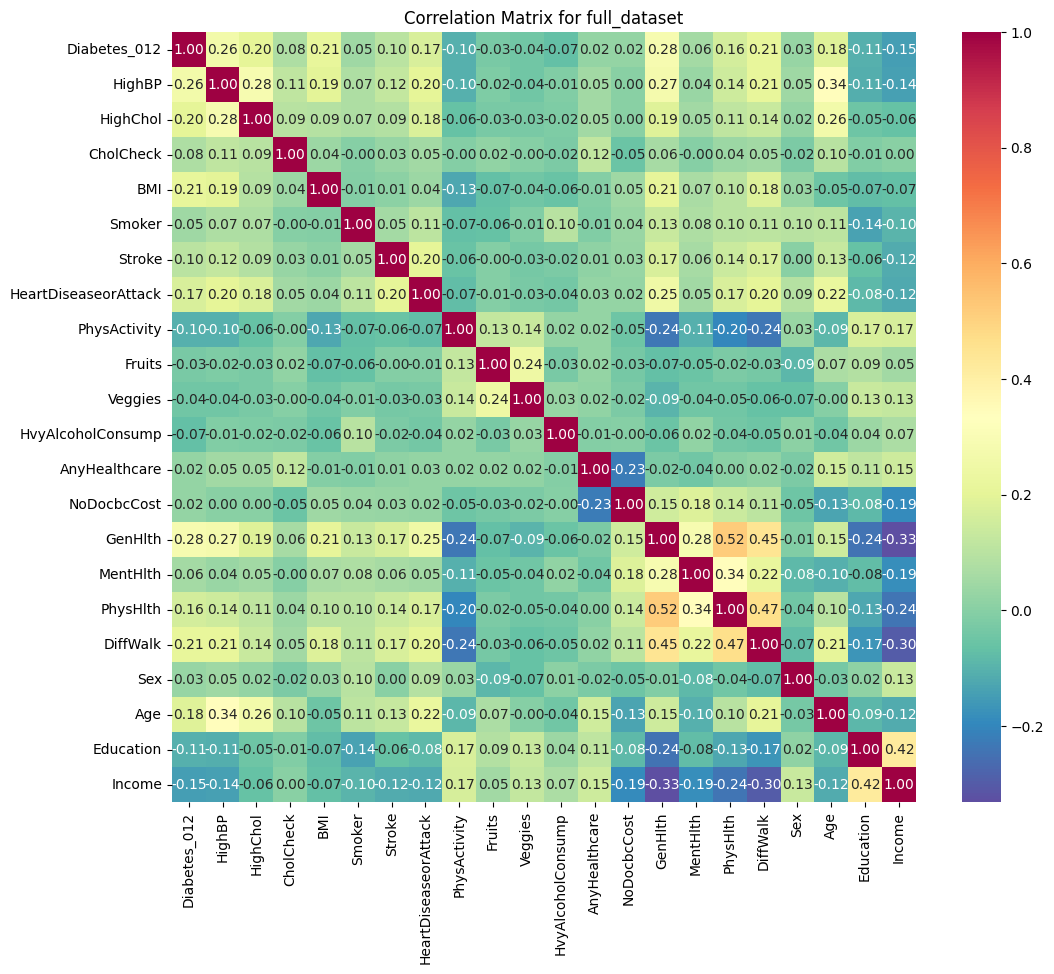

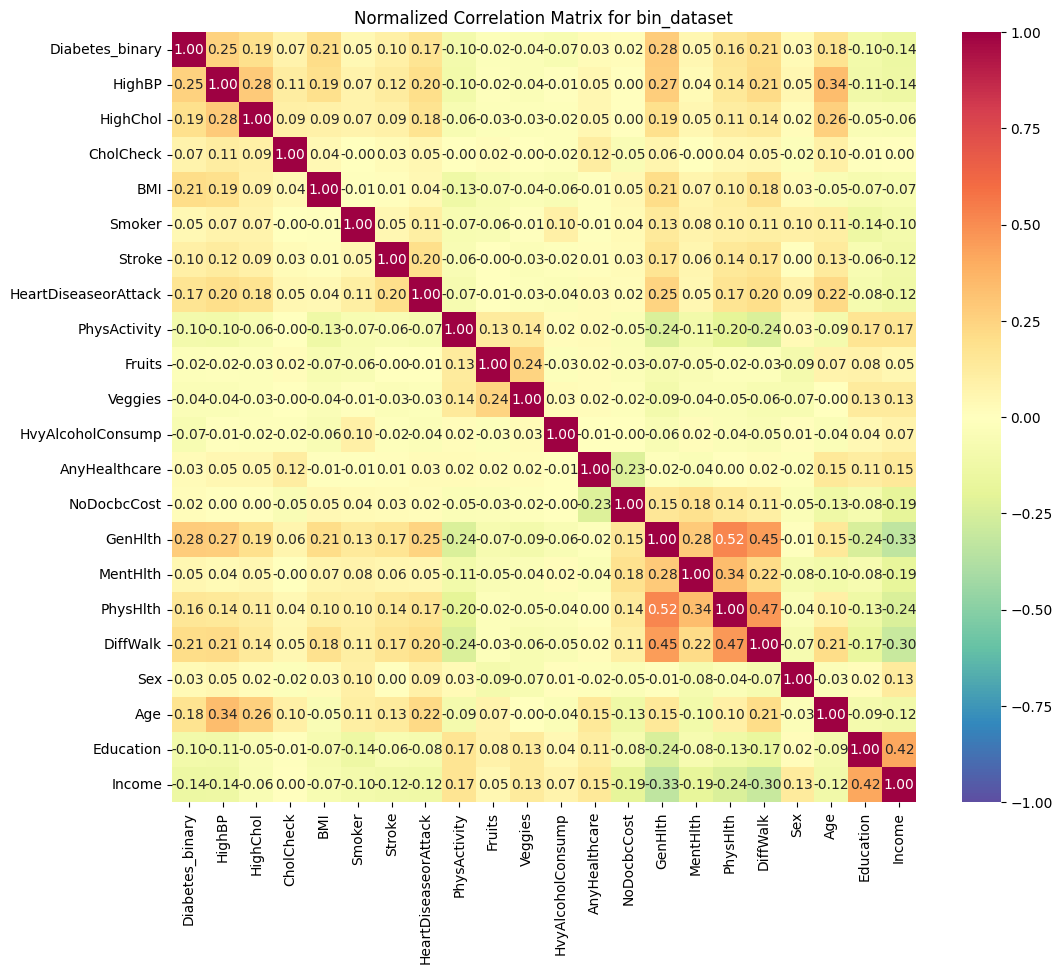

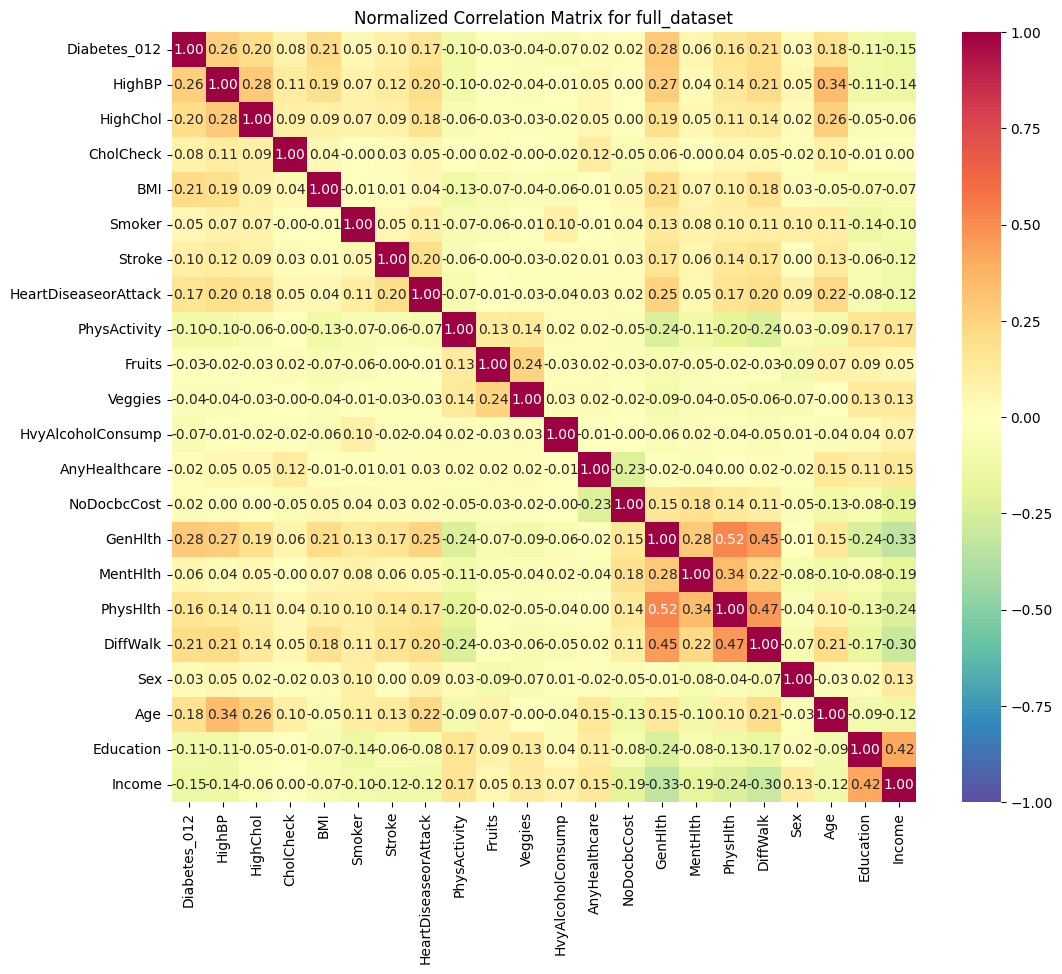

In [6]:
#correlation matrices area for dissplaying correlation in the raw data

# Correlation matrix for bin_dataset
bin_corr_matrix = bin_dataset.corr()


# Correlation matrix for full_dataset
full_corr_matrix = full_dataset.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(bin_corr_matrix, annot=True, fmt=".2f", cmap="Spectral_r")
plt.title("Correlation Matrix for bin_dataset")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(full_corr_matrix, annot=True, fmt=".2f", cmap="Spectral_r")
plt.title("Correlation Matrix for full_dataset")
plt.show()


# Update the heatmap plots to reflect the normalized correlation matrices
plt.figure(figsize=(12, 10))
sns.heatmap(bin_corr_matrix, annot=True, fmt=".2f", cmap="Spectral_r", vmin=-1, vmax=1)
plt.title("Normalized Correlation Matrix for bin_dataset")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(full_corr_matrix, annot=True, fmt=".2f", cmap="Spectral_r", vmin=-1, vmax=1)
plt.title("Normalized Correlation Matrix for full_dataset")
plt.show()

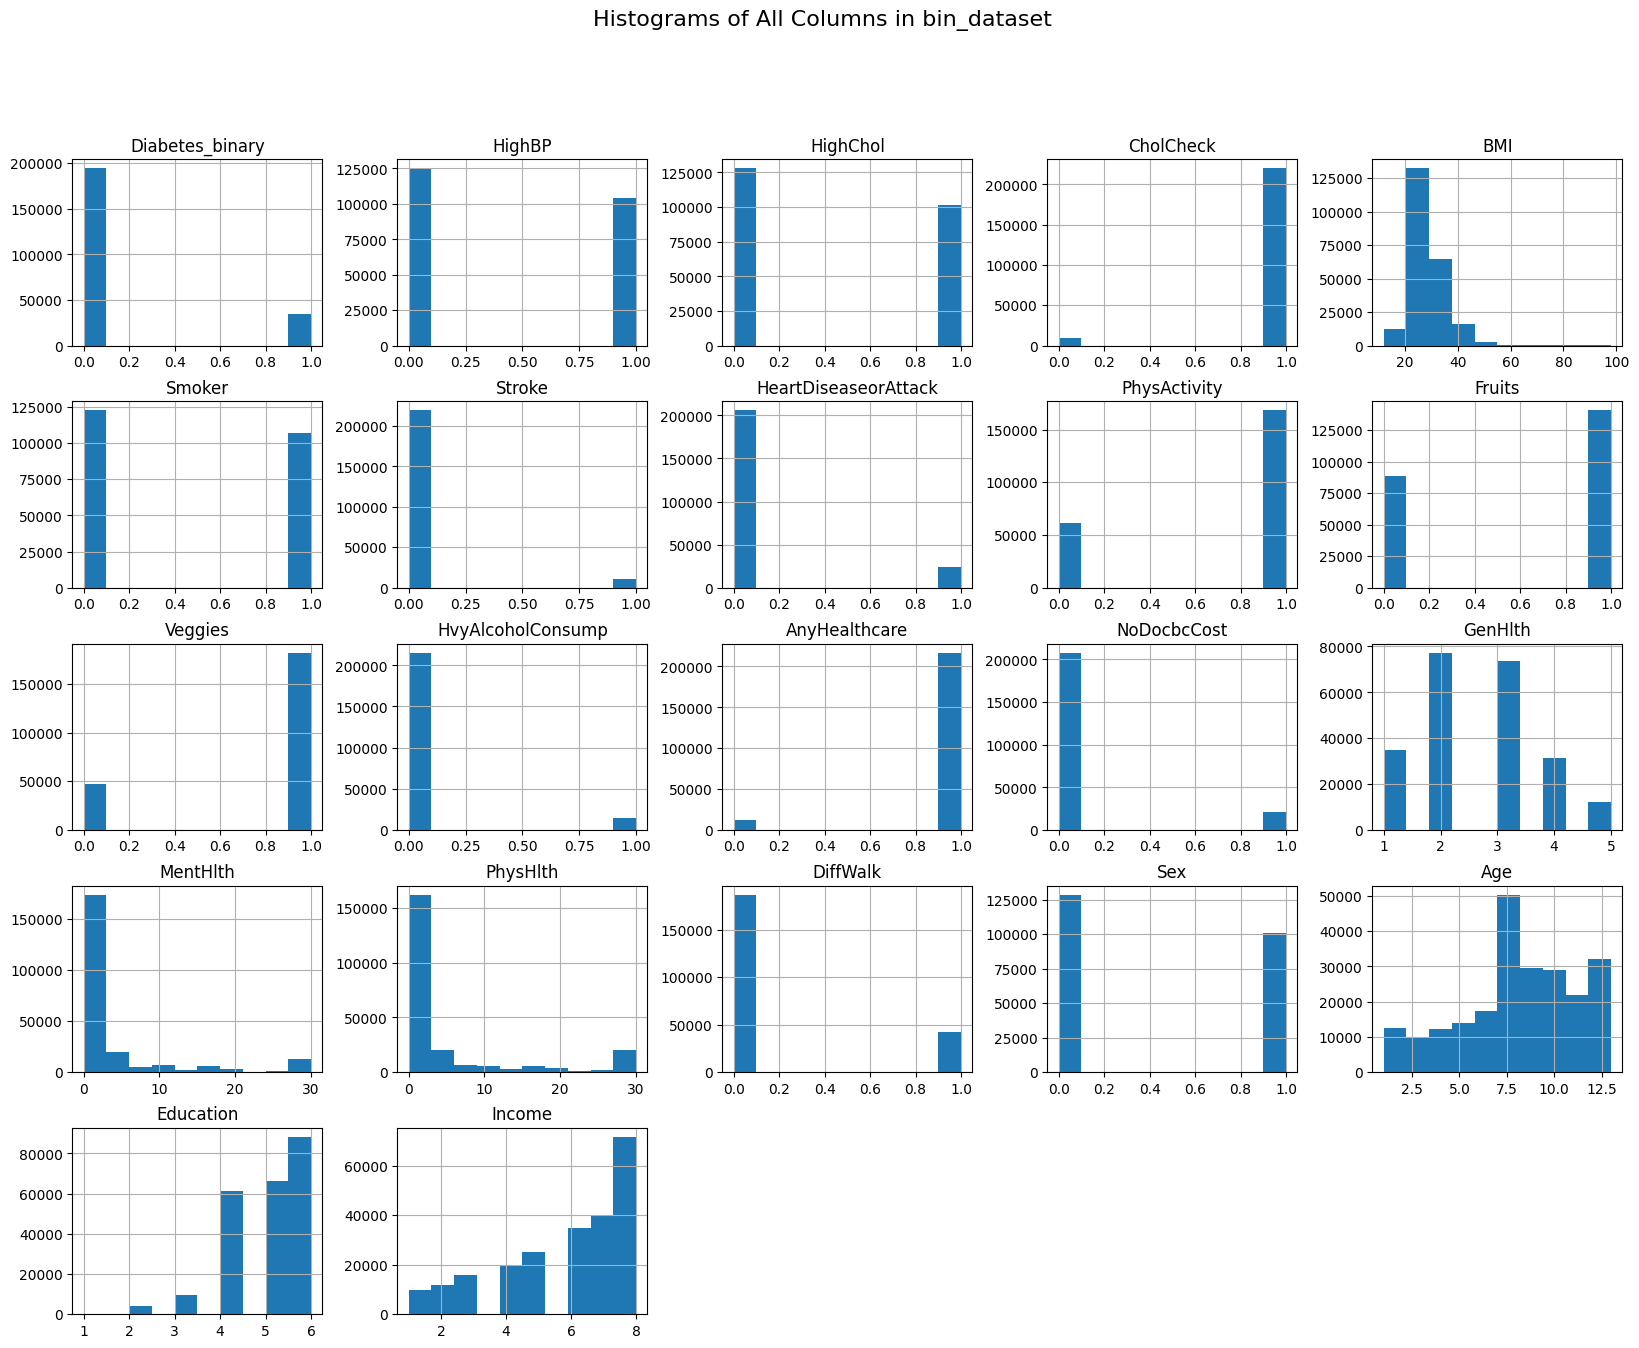

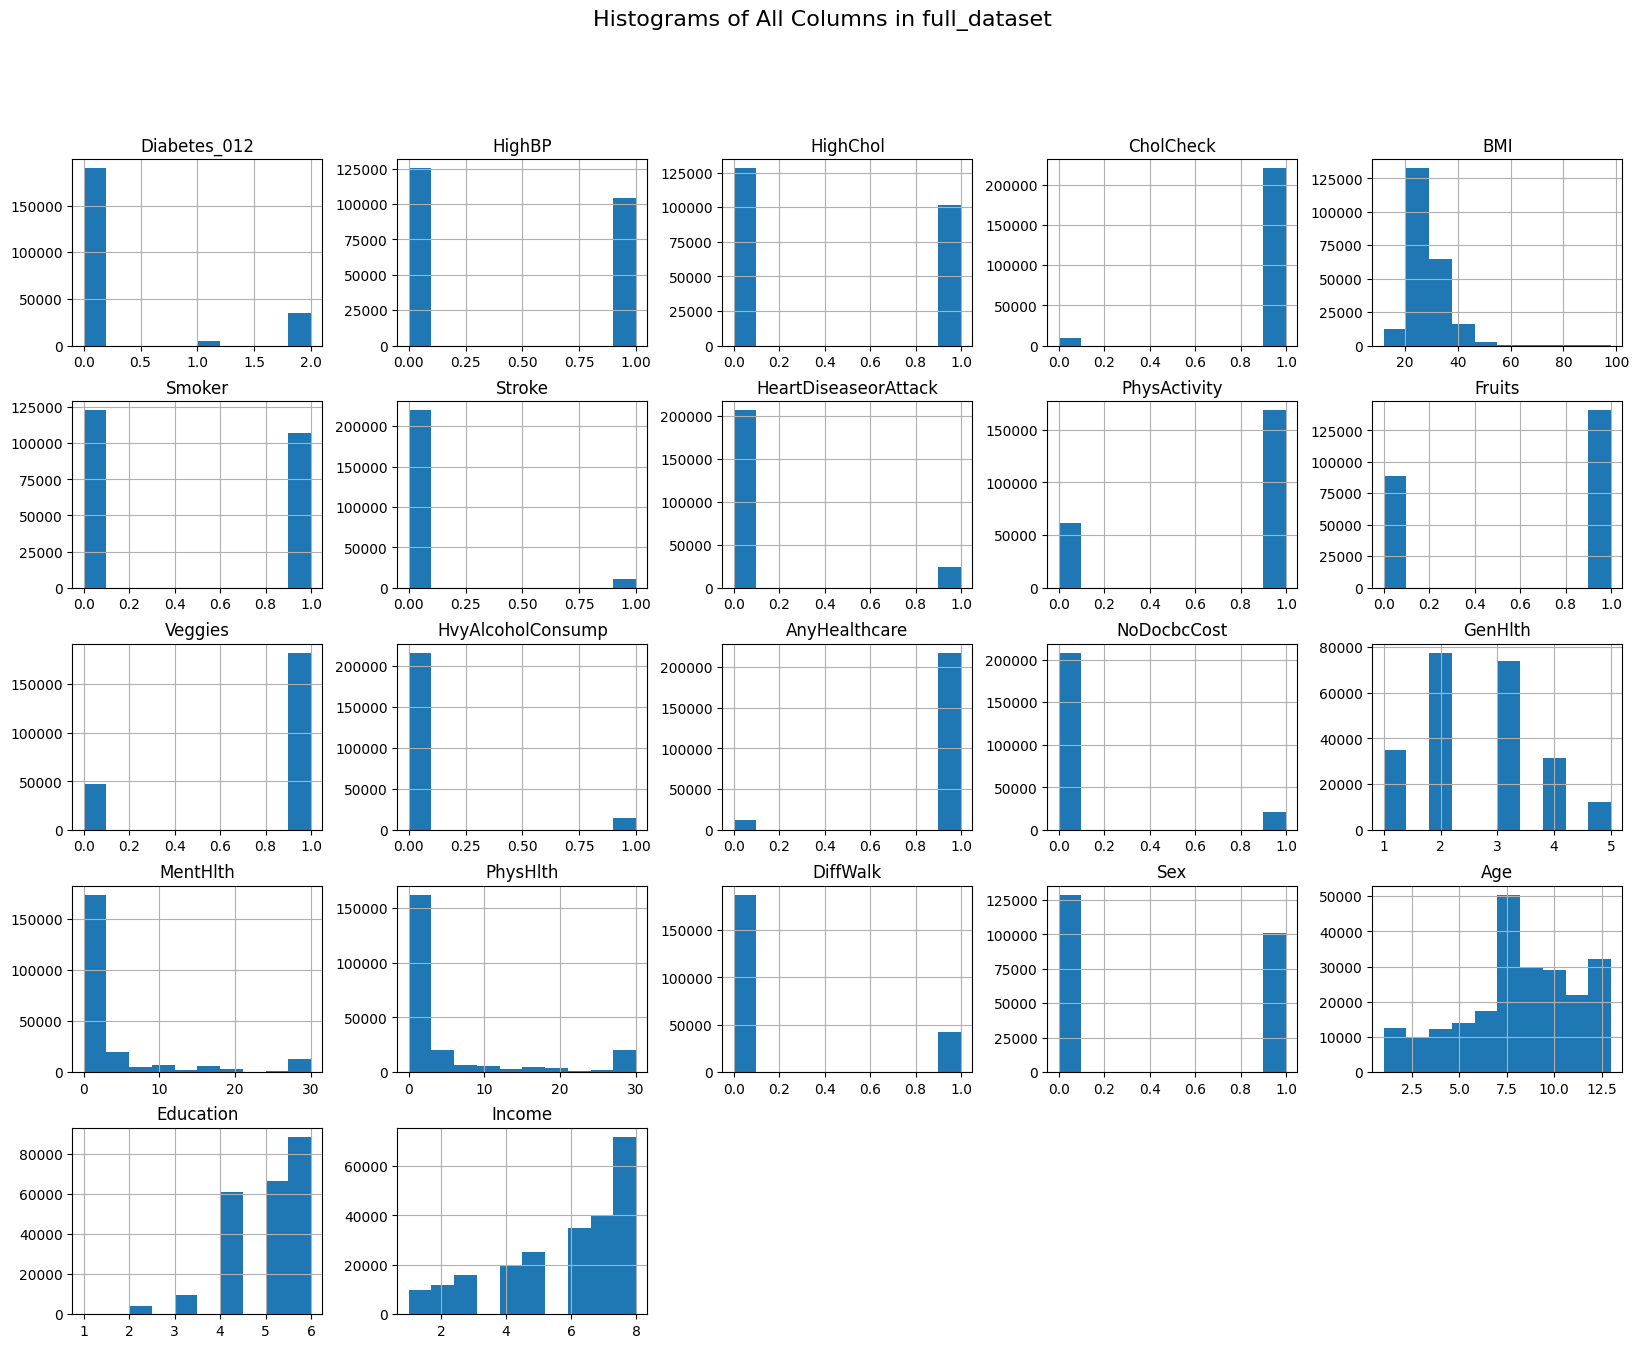

Class counts in bin_dataset:
Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64
Class counts in full_dataset:
Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64


/tmp/ipykernel_60724/723398793.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_binary', data=bin_dataset, palette='Set2')


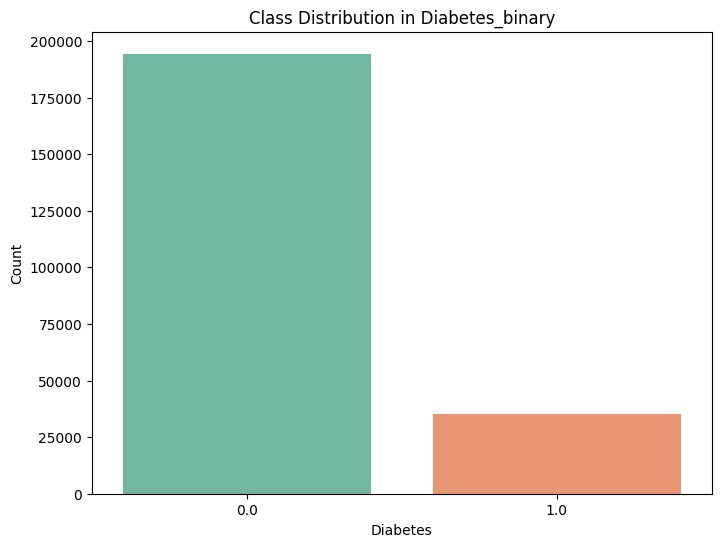

/tmp/ipykernel_60724/723398793.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=full_dataset, palette='Set2')


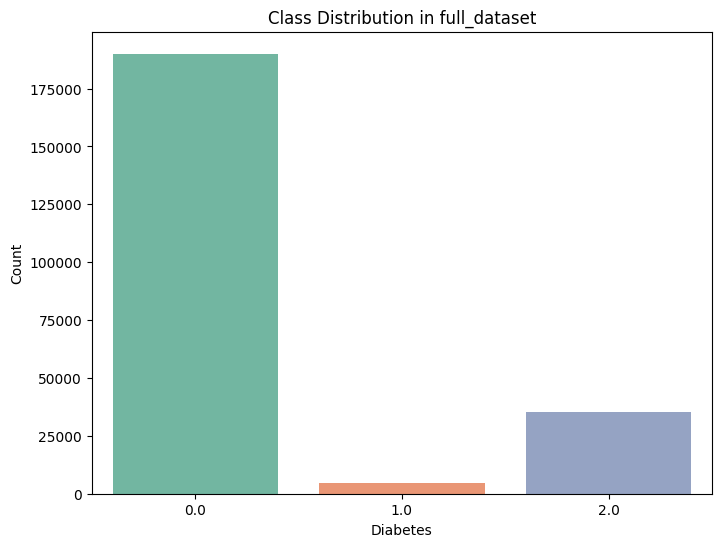

crazy class imbalance in both datasets


In [7]:
bin_dataset.hist(figsize=(20, 15))
plt.suptitle("Histograms of All Columns in bin_dataset", fontsize=16)
plt.show()


full_dataset.hist(figsize=(20, 15))
plt.suptitle("Histograms of All Columns in full_dataset", fontsize=16)
plt.show()
# Check for class imbalance in bin_dataset
class_counts_bin = bin_dataset['Diabetes_binary'].value_counts()
print("Class counts in bin_dataset:")
print(class_counts_bin)
# Check for class imbalance in full_dataset
class_counts_full = full_dataset['Diabetes_012'].value_counts()
print("Class counts in full_dataset:")
print(class_counts_full)
# Plot class distribution for bin_dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=bin_dataset, palette='Set2')
plt.title("Class Distribution in Diabetes_binary")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()
# Plot class distribution for full_dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=full_dataset, palette='Set2')
plt.title("Class Distribution in full_dataset")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()
print("crazy class imbalance in both datasets")




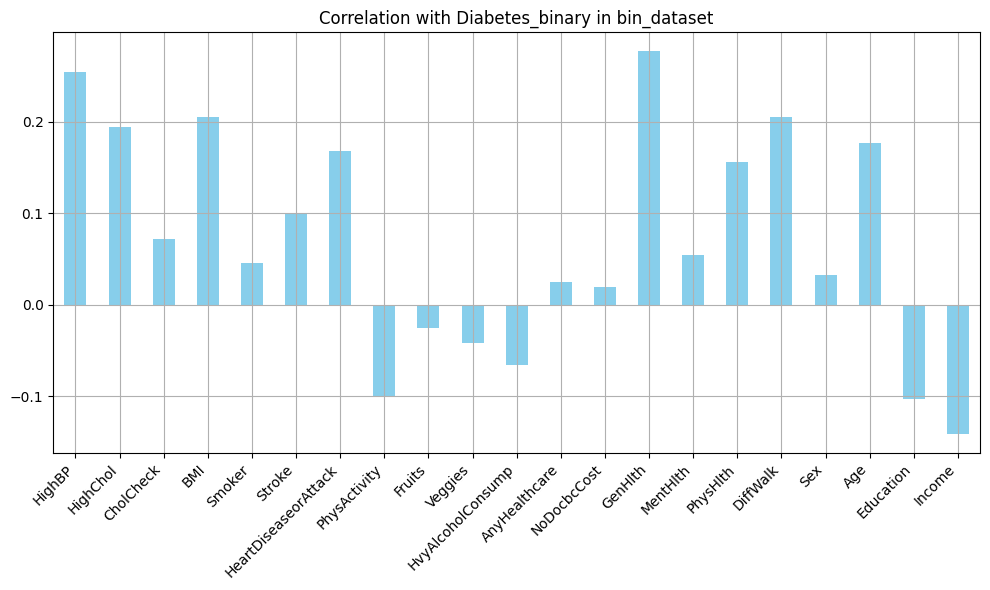

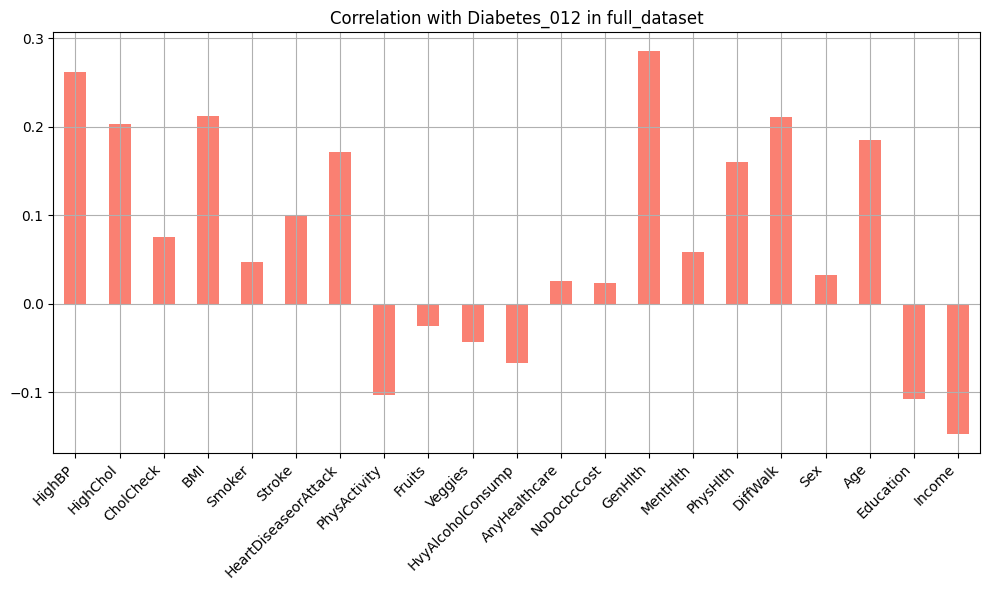

In [8]:
# Bar plot for correlation with Diabetes_binary in bin_dataset
plt.figure(figsize=(10, 6))
bin_corr_with_diabetes = bin_corr_matrix['Diabetes_binary'].drop('Diabetes_binary')
bin_corr_with_diabetes.plot(kind='bar',grid=True, color='skyblue')
plt.title("Correlation with Diabetes_binary in bin_dataset")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar plot for correlation with Diabetes_012 in full_dataset
plt.figure(figsize=(10, 6))
full_corr_with_diabetes = full_corr_matrix['Diabetes_012'].drop('Diabetes_012')
full_corr_with_diabetes.plot(kind='bar', grid=True, color='salmon')
plt.title("Correlation with Diabetes_012 in full_dataset")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
crosstab_result = pd.crosstab(bin_dataset['HighBP'],bin_dataset['Diabetes_binary'])
print(crosstab_result)
print((bin_dataset.groupby('Diabetes_binary')['HighBP'].value_counts())/bin_dataset.groupby('Diabetes_binary')['HighBP'].count()*100 ,"\n")



crosstab_result = pd.crosstab(bin_dataset['HighChol'],bin_dataset['Diabetes_binary'])
print(crosstab_result,"\n")
print((bin_dataset.groupby('Diabetes_binary')['HighChol'].value_counts())/bin_dataset.groupby('Diabetes_binary')['HighChol'].count()*100 ,"\n")



crosstab_result = pd.crosstab(bin_dataset['HeartDiseaseorAttack'],bin_dataset['Diabetes_binary'])
print(crosstab_result,"\n")
print((bin_dataset.groupby('Diabetes_binary')['HeartDiseaseorAttack'].value_counts())/bin_dataset.groupby('Diabetes_binary')['HeartDiseaseorAttack'].count()*100 ,"\n")


crosstab_result = pd.crosstab(bin_dataset['PhysActivity'],bin_dataset['Diabetes_binary'])
print(crosstab_result),"\n"
print((bin_dataset.groupby('Diabetes_binary')['PhysActivity'].value_counts())/bin_dataset.groupby('Diabetes_binary')['PhysActivity'].count()*100 ,"\n")


Diabetes_binary     0.0    1.0
HighBP                        
0.0              116522   8692
1.0               77855  26405
Diabetes_binary  HighBP
0.0              0.0       59.946393
                 1.0       40.053607
1.0              1.0       75.234351
                 0.0       24.765649
dtype: float64 

Diabetes_binary     0.0    1.0
HighChol                      
0.0              116528  11601
1.0               77849  23496 

Diabetes_binary  HighChol
0.0              0.0         59.949480
                 1.0         40.050520
1.0              1.0         66.945893
                 0.0         33.054107
dtype: float64 

Diabetes_binary          0.0    1.0
HeartDiseaseorAttack               
0.0                   178520  27241
1.0                    15857   7856 

Diabetes_binary  HeartDiseaseorAttack
0.0              0.0                     91.842142
                 1.0                      8.157858
1.0              0.0                     77.616320
                 1.0     

### SMOTE

In [10]:
from imblearn.over_sampling import SMOTE

#data imbalance lets solve this with SMOTE
# SMOTE (Synthetic Minority Oversampling Technique) is used to address class imbalance in datasets.
# It generates synthetic samples for the minority class by interpolating between existing samples.
# This helps to balance the dataset and improve the performance of machine learning models.


# Separate features and target variable
X = bin_dataset.drop('Diabetes_binary', axis=1)
y = bin_dataset['Diabetes_binary']




# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
balanced_bin_dataset = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Diabetes_binary'])], axis=1)

print("Original class distribution:")
print(bin_dataset['Diabetes_binary'].value_counts())
print("\nResampled class distribution:")
print(balanced_bin_dataset['Diabetes_binary'].value_counts())

Original class distribution:
Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

Resampled class distribution:
Diabetes_binary
0.0    194377
1.0    194377
Name: count, dtype: int64


/tmp/ipykernel_60724/2981581655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_binary', data=balanced_bin_dataset, palette='Set2')


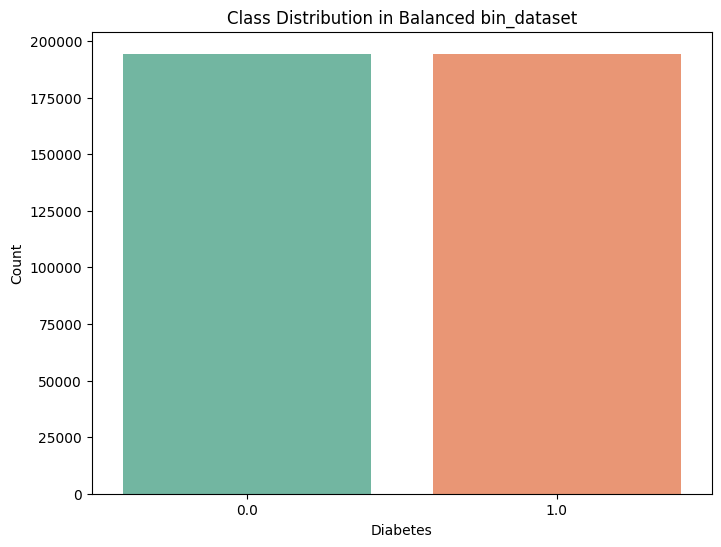

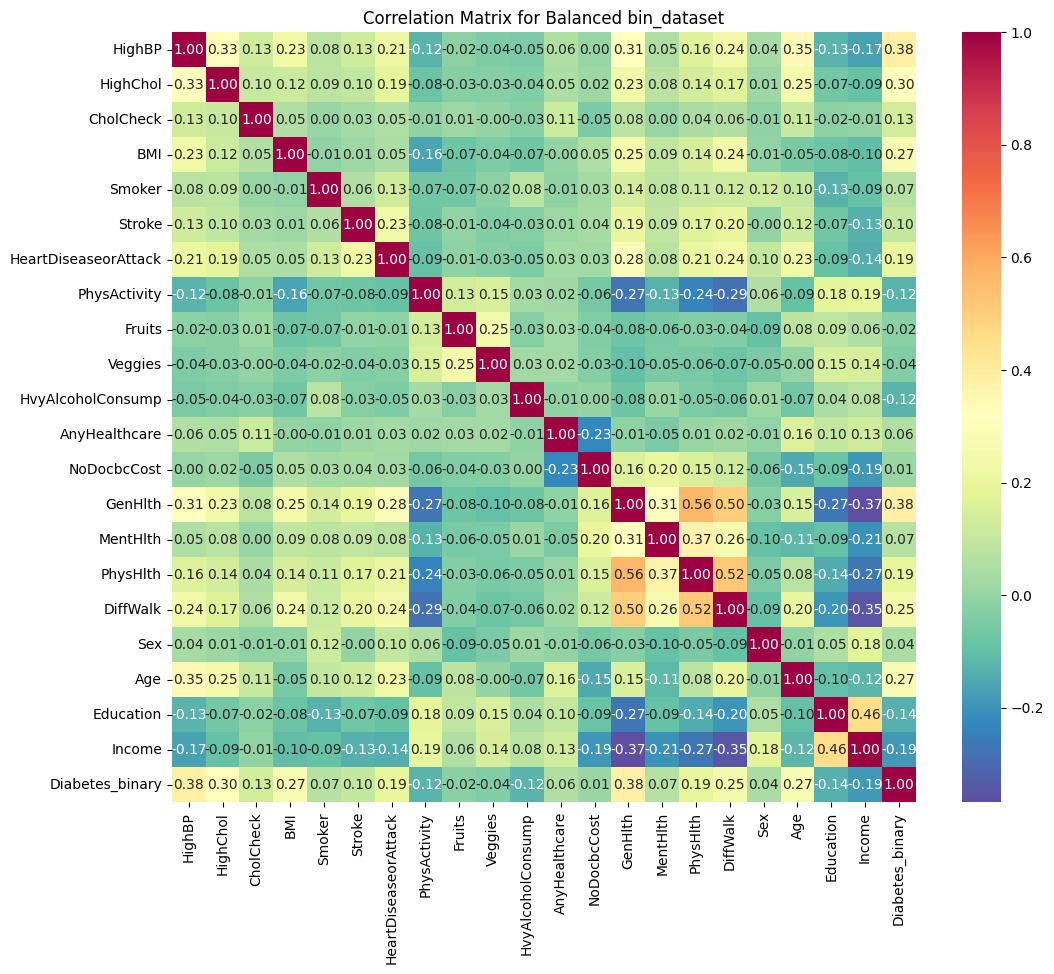

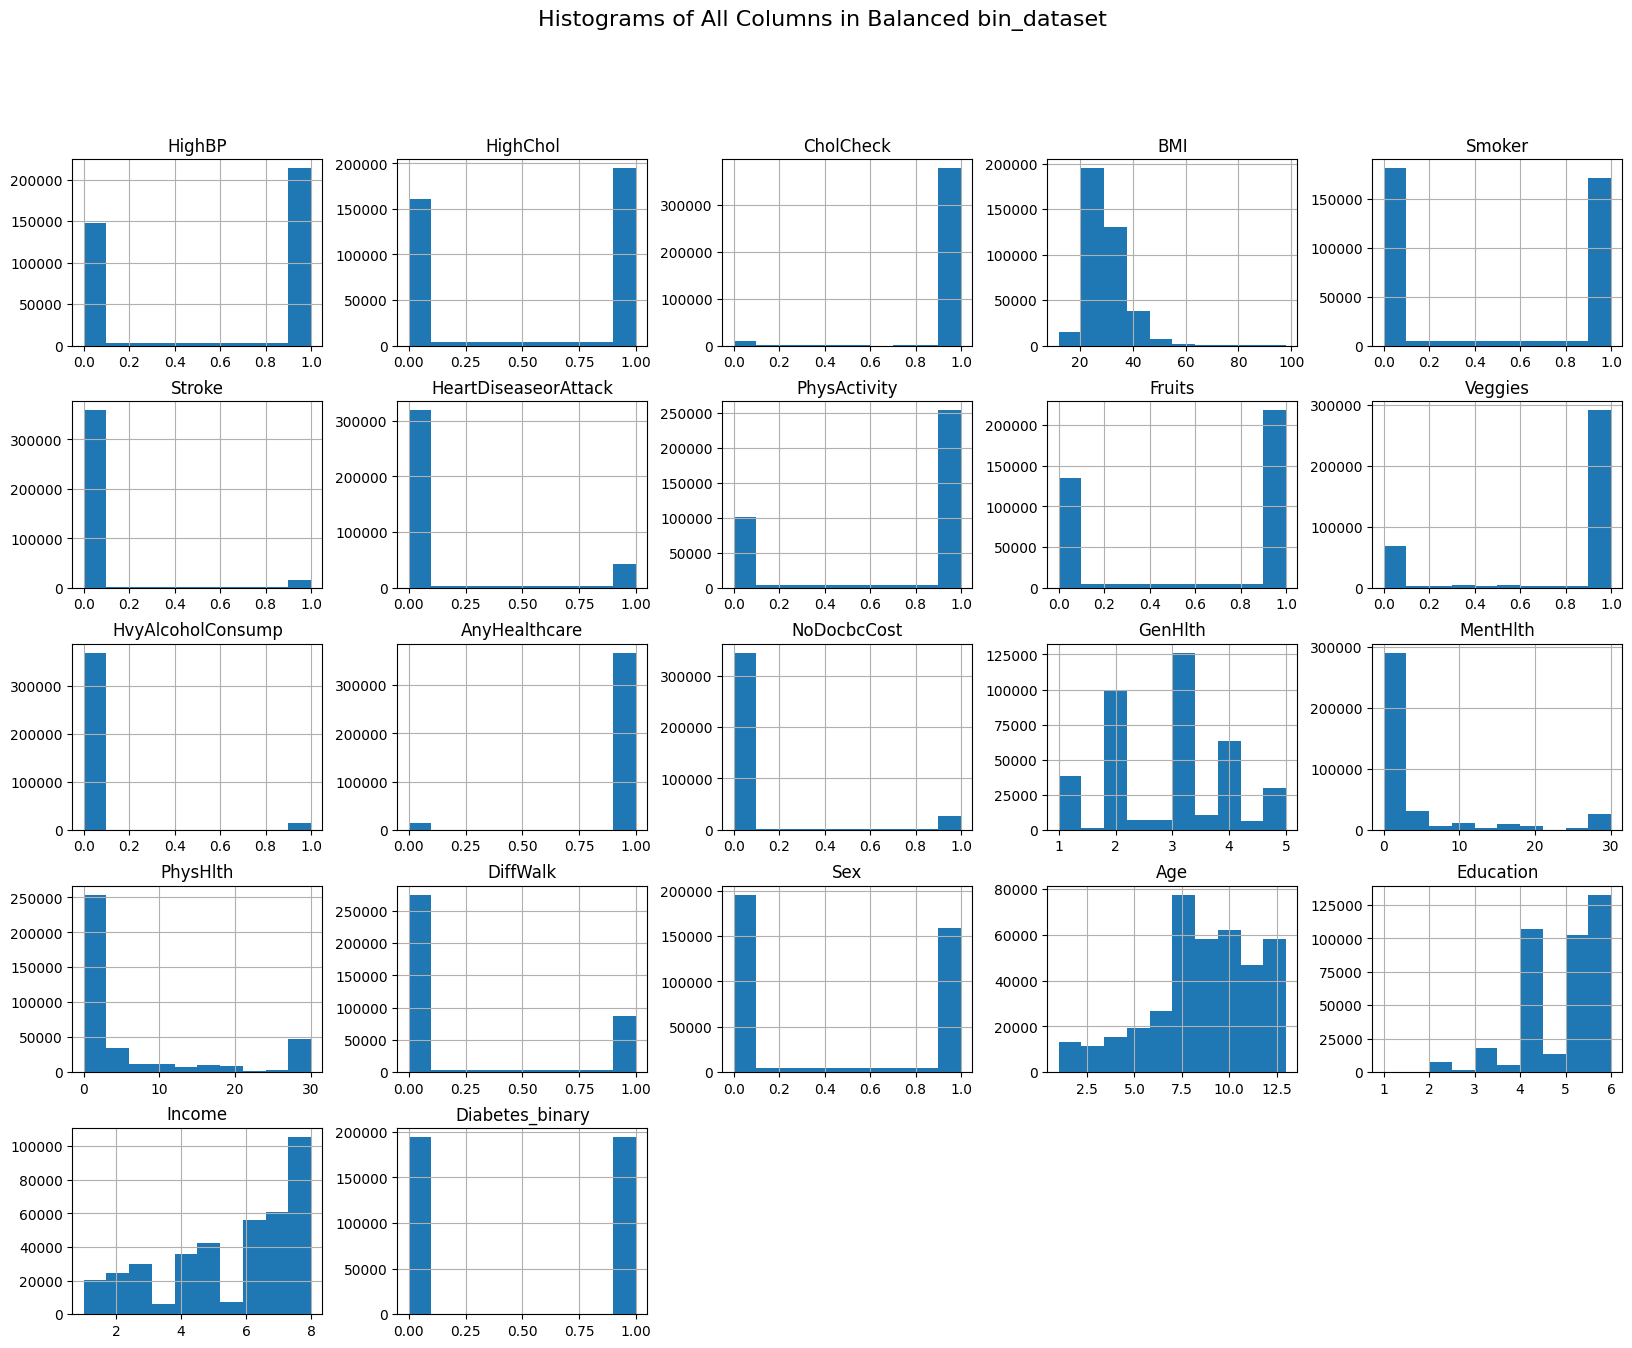

In [11]:
# Plot class distribution for balanced bin_dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=balanced_bin_dataset, palette='Set2')
plt.title("Class Distribution in Balanced bin_dataset")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()
# Plotting the correlation matrix for the balanced dataset
plt.figure(figsize=(12, 10))
bin_corr_matrix = balanced_bin_dataset.corr()
sns.heatmap(bin_corr_matrix, annot=True, fmt=".2f", cmap="Spectral_r")
plt.title("Correlation Matrix for Balanced bin_dataset")
plt.show()
# Plotting histograms for the balanced dataset
balanced_bin_dataset.hist(figsize=(20, 15))
plt.suptitle("Histograms of All Columns in Balanced bin_dataset", fontsize=16)
plt.show()


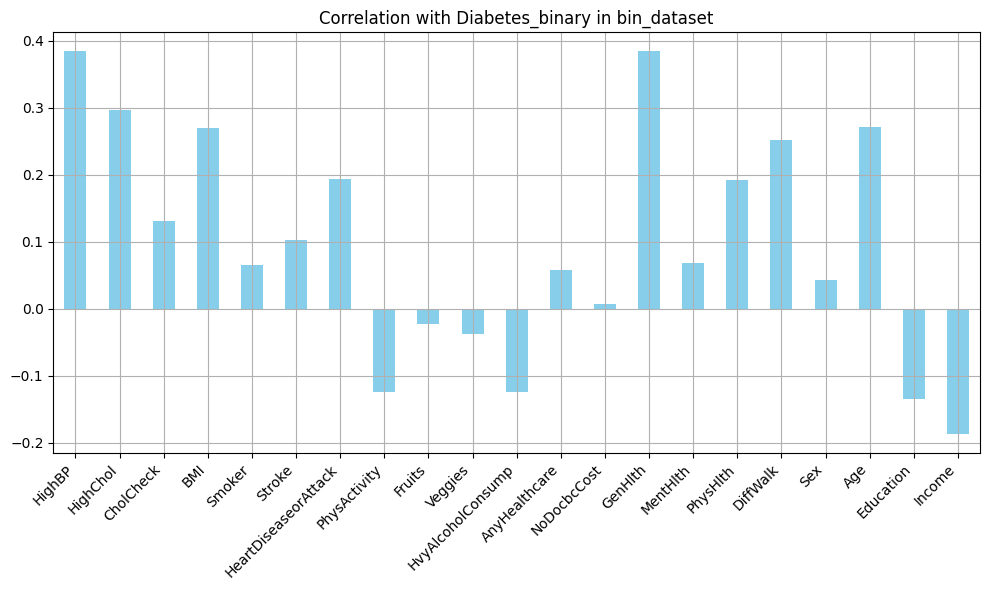

In [12]:
# Bar plot for correlation with Diabetes_binary in bin_dataset
plt.figure(figsize=(10, 6))
bin_corr_with_diabetes = bin_corr_matrix['Diabetes_binary'].drop('Diabetes_binary')
bin_corr_with_diabetes.plot(kind='bar',grid=True, color='skyblue')
plt.title("Correlation with Diabetes_binary in bin_dataset")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [13]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7419197180743656
Confusion Matrix:
 [[27756 11174]
 [ 8892 29929]]


cool ressults for a logistic regression very usable as a base model especially after SMOTE

In [ ]:
# Train the logistic regression model using the SMOTE data
log_reg.fit(X_resampled, y_resampled)

# Make predictions on the original data
y_pred = log_reg.predict(bin_dataset.drop('Diabetes_binary', axis=1))

# Evaluate the model
accuracy_original = accuracy_score(bin_dataset['Diabetes_binary'], y_pred)
conf_matrix_original = confusion_matrix(bin_dataset['Diabetes_binary'], y_pred)

print("Accuracy on original data:", accuracy_original)
print("Confusion Matrix on original data:\n", conf_matrix_original)

#conclusion bad results

NameError: name 'log_reg' is not defined

satisfying my curiosity of running the old dataset on the SMOTE dataset works even if a bit worse than the split data model above

In [1]:


#dumb code to run on a cpu trying on a gpu next 400k cases is not practical for the problem 
#fine for simpler calculations but in this case is useless due to time complexity (70 minutes at the time of writing)
#kernel crash at 22:46 May 1st non sstandardized data




# Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)

NameError: name 'SVC' is not defined

In [14]:
#time to normalize the data mybe I'm lucky and doesn't take 70 minutes

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)
# Initialize the SVM model
svm_model_scaled = SVC(kernel='rbf', random_state=42)


print("i have scaled data")
# Train the SVM model on the scaled training data
svm_model_scaled.fit(X_train_scaled, y_train_scaled)
print("i have model")
# Make predictions on the scaled test set
y_pred_svm_scaled = svm_model_scaled.predict(X_test_scaled)
print("i have tested :) \n")

# Evaluate the SVM model on the scaled data
accuracy_svm_scaled = accuracy_score(y_test_scaled, y_pred_svm_scaled)
conf_matrix_svm_scaled = confusion_matrix(y_test_scaled, y_pred_svm_scaled)
print("SVM Scaled Accuracy:", accuracy_svm_scaled)
print("SVM Scaled Confusion Matrix:\n", conf_matrix_svm_scaled)


i have scaled data
i have model
i have tested :) 

SVM Scaled Accuracy: 0.8647734434283804
SVM Scaled Confusion Matrix:
 [[36064  2866]
 [ 7648 31173]]


In [ ]:
# GPU time
#convert data to cuml
import cudf
import cupy as cp
from cuml.svm import SVC as cuSVC
from cuml.metrics import accuracy_score as cu_accuracy_score
from cuml.model_selection import train_test_split as cu_train_test_split
from cuml.preprocessing import StandardScaler as cuStandardScaler

# Convert the data to cuDF DataFrame
cudf_bin_dataset = cudf.DataFrame.from_pandas(bin_dataset)
cudf_bin_dataset.info()
scaler = cuStandardScaler()
X_resampled_scaled_cudf = scaler.fit_transform(cudf_bin_dataset.drop(columns=['Diabetes_binary']))
X_train_scaled_cudf, X_test_scaled_cudf, y_train_scaled_cudf, y_test_scaled_cudf = cu_train_test_split(X_resampled_scaled_cudf, cudf_bin_dataset['Diabetes_binary'], test_size=0.2, random_state=42)

gpu_svm_model = cuSVC(kernel='rbf', random_state=42)
# Train the SVM model on the scaled training data
gpu_svm_model.fit(X_train_scaled_cudf, y_train_scaled_cudf)
print("i have gpu model")
# Make predictions on the scaled test set
y_pred_gpu_svm_scaled = gpu_svm_model.predict(X_test_scaled_cudf)
print("i have gpu tested :) \n")
# Evaluate the SVM model on the scaled data
accuracy_gpu_svm_scaled = cu_accuracy_score(y_test_scaled_cudf, y_pred_gpu_svm_scaled)
conf_matrix_gpu_svm_scaled = confusion_matrix(y_test_scaled_cudf.to_numpy(), y_pred_gpu_svm_scaled.to_numpy())
print("SVM Scaled GPU Accuracy:", accuracy_gpu_svm_scaled)
print("SVM Scaled GPU Confusion Matrix:\n", conf_matrix_gpu_svm_scaled)



<class 'cudf.core.dataframe.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  MentHlt

In [16]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss

# Initialize undersampling algorithms
random_under_sampler = RandomUnderSampler(random_state=42)
tomek_links = TomekLinks()
near_miss = NearMiss()

# Separate features and target variable
X = bin_dataset.drop(columns=['Diabetes_binary'])
y = bin_dataset['Diabetes_binary']

# Apply Random Under Sampling
X_rus, y_rus = random_under_sampler.fit_resample(X, y)
print("Random Under Sampling:")
print("Resampled dataset shape:", y_rus.value_counts())

# Apply Tomek Links
X_tomek, y_tomek = tomek_links.fit_resample(X, y)
print("\nTomek Links:")
print("Resampled dataset shape:", y_tomek.value_counts())

# Apply Near Miss
X_nm, y_nm = near_miss.fit_resample(X, y)
print("\nNear Miss:")
print("Resampled dataset shape:", y_nm.value_counts())

Random Under Sampling:
Resampled dataset shape: Diabetes_binary
0.0    35097
1.0    35097
Name: count, dtype: int64

Tomek Links:
Resampled dataset shape: Diabetes_binary
0.0    186221
1.0     35097
Name: count, dtype: int64

Near Miss:
Resampled dataset shape: Diabetes_binary
0.0    35097
1.0    35097
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

import torch.nn as nn
import torch.optim as optim

# Define a PyTorch neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Define a custom wrapper for the PyTorch model
class TorchNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, hidden_size, output_size, lr=0.001, epochs=10, batch_size=32):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.device = device  # Use the device defined earlier
        self.model = NeuralNet(input_size, hidden_size, output_size).to(self.device)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

    def fit(self, X, y):
        X_tensor = torch.tensor(X.values, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y.values, dtype=torch.long).to(self.device)
        dataset = TensorDataset(X_tensor, y_tensor)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model.train()
        for epoch in range(self.epochs):
            for batch_X, batch_y in dataloader:
                self.optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = self.criterion(outputs, batch_y)
                loss.backward()
                self.optimizer.step()
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X.values, dtype=torch.float32).to(self.device)
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X_tensor)
        return torch.argmax(outputs, dim=1).cpu().numpy()

# Define the parameter grid for grid search
param_grid = {
    'hidden_size': [32, 64, 128],
    'lr': [0.001, 0.01],
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

# Wrap the PyTorch model for grid search
torch_nn = TorchNNClassifier(input_size=X_train.shape[1], hidden_size=64, output_size=2)

# Perform grid search
grid_search = GridSearchCV(estimator=torch_nn, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)